In [1]:
import glob2
import os
import pcl
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

In [12]:
#dataset_path = "/srv/data/storage/person/SAM-GOV-001/measurements/1530268828151/pc/"
dataset_path = "/srv/data/storage/person/MP_WHH_2735/measurements/1539321031717/pc"

In [13]:
# Getting the paths for point clouds.
glob_search_path = os.path.join(dataset_path, "**/*.pcd")
pcd_paths = glob2.glob(glob_search_path)

In [14]:
print("pcd_paths", len(pcd_paths))

pcd_paths 46


0
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45


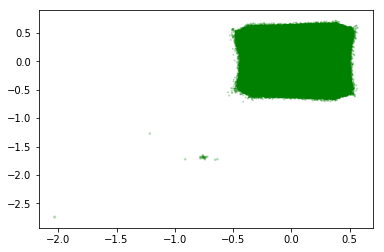

In [15]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro', animated=True)

# animation function.  This is called sequentially
def animate(i):
    print(i)
    plt.clf
    p = pcl.load(pcd_paths[i])
    parray = np.asarray(p)
    frame = plt.scatter(parray[:,1],parray[:,0], parray[:,2], c="g", alpha=0.2)
    return frame,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,
                               frames=len(pcd_paths), interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('MP_WHH_2735.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

In [18]:
for pcdfile in pcd_paths:
    p = pcl.load(pcdfile)
    parray = np.asarray(p)
    plt.scatter(parray[:,1],parray[:,0], parray[:,2], c="g", alpha=0.2)
    plt.show()